In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

import pandas as pd
import numpy as np

(9,
 1,
 [23.13199840542086, -17.857998020754394, 0.0, 0.0],
 [32.644998318117814, -10.266695963946972, 0.0, 0.0])

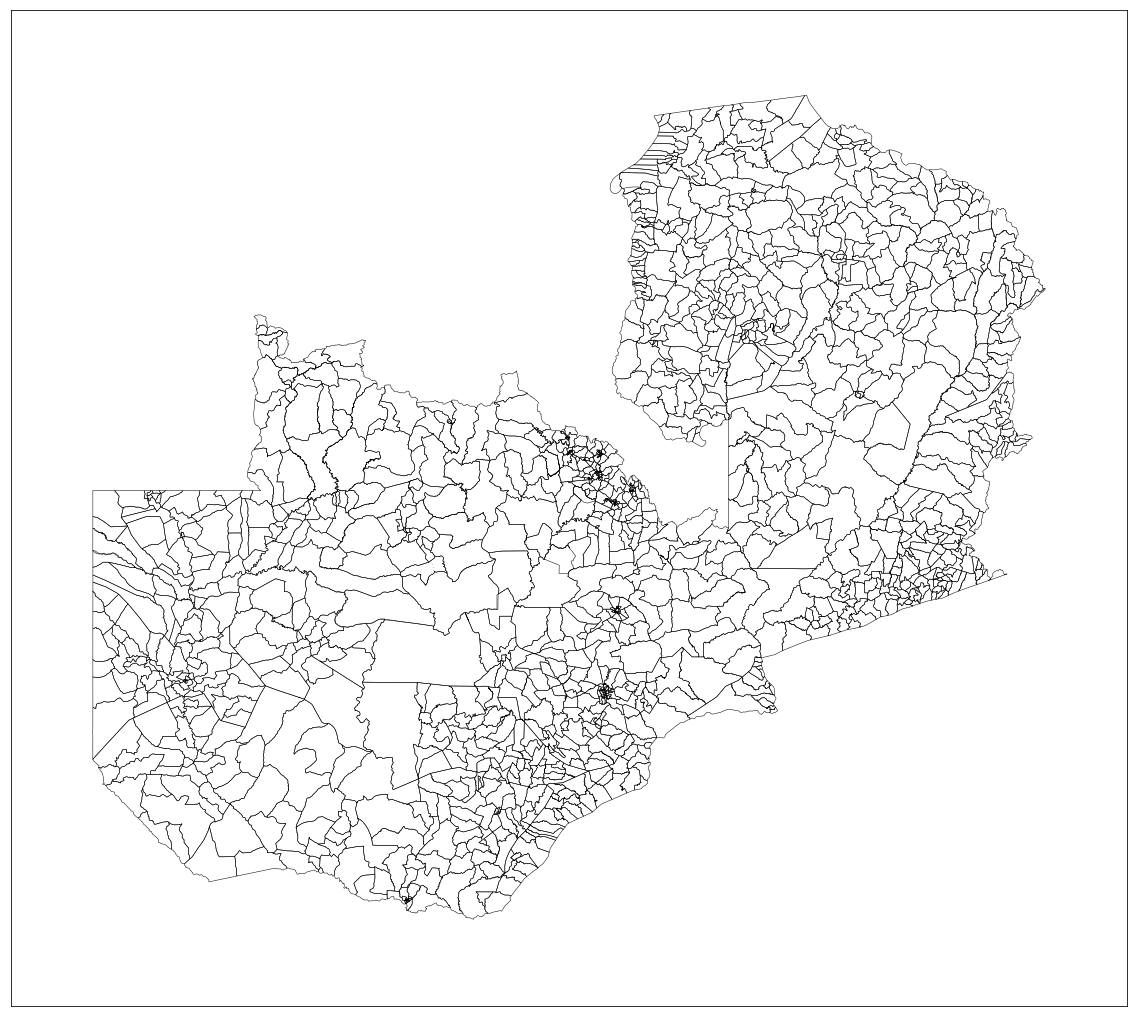

In [2]:
testFig, testAx = plt.subplots(figsize = (20, 20))
m = Basemap(resolution = 'h', # c, l, i, h, f or None
           projection = 'merc',
           llcrnrlon = 20.99, llcrnrlat = -19.09, urcrnrlon = 34.71, urcrnrlat = -7.19)
m.readshapefile('/home/ram22/dataDrive/dataProjects/povMap/zambiaLFSmapping/0_originalData/Zambia/administrative_shapefiles/ward/WardShapefiles11June2014/Final_edits_Zambia_Wards_2014t',
                'wards')
m.readshapefile('/home/ram22/Dropbox/dataProjects/zambiaLFSmapping/0_originalData/extraShapeFiles/ZambiaData/CityZambia',
                'cities')
m.readshapefile('/home/ram22/Dropbox/dataProjects/zambiaLFSmapping/zambiaRoads',
                'roads')


#m.etopo(scale = 3.0, alpha = 0.5)

In [3]:
laborAll = pd.read_csv('/home/ram22/Dropbox/dataProjects/zambiaLFSmapping/3_csvOutput/censuswardlabor1564.csv')

In [4]:
dfPoly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), closed = True) for shape in m.wards],
        'wardid': [int(ward['ID']) for ward in m.wards_info]
    })

dfPoly = dfPoly.merge(laborAll, on='wardid', how='outer', indicator = True)

In [5]:
dfPoly['popDeciles'], bins = pd.qcut(dfPoly.population1564, 10, labels = False, retbins = True)
bins = bins.astype(int)
print(bins)

dfPoly['popDecilesLabel'] = bins[dfPoly.popDeciles]

[   58  1037  1596  2102  2643  3240  3952  4801  5941  8908 94885]


In [6]:
dfPoly.head()

,shapes,wardid,dist,const,ward,population1564,popthiscase,lf7days,lf12months,empl7days,empl12months,unem7days,unem12months,_merge,popDeciles,popDecilesLabel
0,"Poly((202258, 458281) ...)",100113408,1001,134,8,1879,1879,1269,1287,1260,1284,9.0,3.0,both,2,1596
1,"Poly((189964, 474979) ...)",100113409,1001,134,9,4889,4889,2739,2885,2571,2756,168.0,129.0,both,7,4801
2,"Poly((159119, 471997) ...)",100113410,1001,134,10,1752,1752,1503,1519,1503,1519,NaN,NaN,both,2,1596
3,"Poly((154903, 464189) ...)",100113411,1001,134,11,3417,3417,2591,2582,2570,2556,21.0,26.0,both,5,3240
4,"Poly((191108, 460386) ...)",100113412,1001,134,12,2102,2102,1567,1462,1564,1462,3.0,NaN,both,2,1596


/home/ram22/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/ram22/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ram22/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


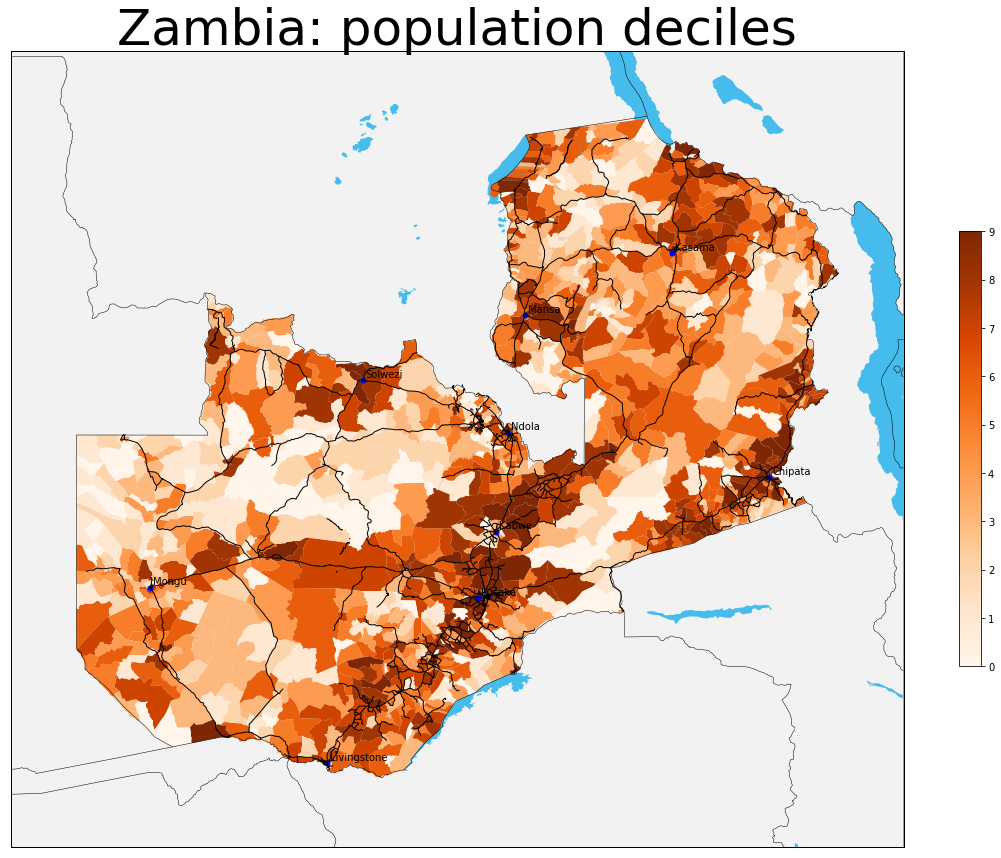

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))

cmap = plt.get_cmap('Oranges')   

pc = PatchCollection(dfPoly.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(dfPoly.popDeciles.fillna(0).values)))
ax.add_collection(pc)

mapper = cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(dfPoly.popDeciles)

m.drawmapboundary(fill_color = '#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color = '#46bcec')
m.drawcountries()


for info, city in zip(m.cities_info, m.cities):
    plt.plot(city[0], city[1], 'ob', markersize=5)
    plt.text(city[0] + 5000, city[1] + 5000, info['CITY_NAME'])
    
for info, road in zip(m.roads_info, m.roads):
        x, y = zip(*road) 
        m.plot(x, y, marker=None,color='b', linewidth=1)

plt.colorbar(mapper, shrink=0.4)
plt.title('Zambia: population deciles', fontsize = 50)

In [8]:
m.readshapefile('/home/ram22/Dropbox/dataProjects/zambiaLFSmapping/0_originalData/extraShapeFiles/ZambiaData/CityZambia',
                'cities')


(9,
 1,
 [23.13199840542086, -17.857998020754394, 0.0, 0.0],
 [32.644998318117814, -10.266695963946972, 0.0, 0.0])

In [9]:
cities_info = m.readshapefile('/home/ram22/Dropbox/dataProjects/zambiaLFSmapping/0_originalData/extraShapeFiles/ZambiaData/CityZambia',
                'cities')
print(cities_info)

(9, 1, [23.13199840542086, -17.857998020754394, 0.0, 0.0], [32.644998318117814, -10.266695963946972, 0.0, 0.0])


In [19]:
print(m.cities_info)

[{'POP': '9.10560000000e+004', 'PORT_ID': '0.00000000000e+000', 'ADMIN_NAME': 'Northern', 'POP_CLASS': '50,000 to 99,999', 'CNTRY_NAME': 'Zambia', 'CITY_NAME': 'Kasama', 'FIPS_CNTRY': 'ZA', 'GMI_ADMIN': 'ZMB-NRT', 'STATUS': 'Provincial capital', 'POP_RANK': '6.00000000000e+000', 'LABEL_FLAG': '0.00000000000e+000'}, {'POP': '4.22770000000e+004', 'PORT_ID': '0.00000000000e+000', 'ADMIN_NAME': 'Luapula', 'POP_CLASS': 'Less than 50,000', 'CNTRY_NAME': 'Zambia', 'CITY_NAME': 'Mansa', 'FIPS_CNTRY': 'ZA', 'GMI_ADMIN': 'ZMB-LUA', 'STATUS': 'Provincial capital', 'POP_RANK': '7.00000000000e+000', 'LABEL_FLAG': '0.00000000000e+000'}, {'POP': '3.94518000000e+005', 'PORT_ID': '0.00000000000e+000', 'ADMIN_NAME': 'Copperbelt', 'POP_CLASS': '250,000 to 499,999', 'CNTRY_NAME': 'Zambia', 'CITY_NAME': 'Ndola', 'FIPS_CNTRY': 'ZA', 'GMI_ADMIN': 'ZMB-CPP', 'STATUS': 'Provincial capital', 'POP_RANK': '4.00000000000e+000', 'LABEL_FLAG': '0.00000000000e+000'}, {'POP': '8.59630000000e+004', 'PORT_ID': '0.000000

/home/ram22/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ram22/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


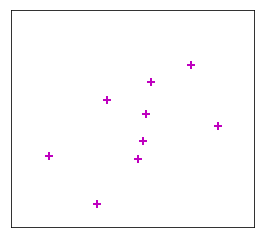

In [22]:
for info, city in zip(m.cities_info, m.cities):
    m.plot(city[0], city[1], marker='+', color='m', markersize=8, markeredgewidth=2)


(695,
 3,
 [22.15279300015729, -17.968221999969398, 0.0, 0.0],
 [33.70689460423201, -8.505370000292245, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7fb36e58e780>)

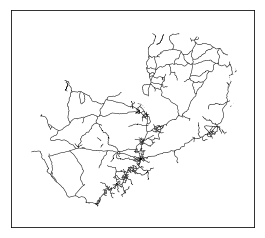

In [48]:
#ogr2ogr -t_srs EPSG:4326 zambiaRoads_WGS84.shp '/home/ram22/Dropbox/dataProjects/zambiaLFSmapping/0_originalData/extraShapeFiles/ZambiaData/RoadsZambia.shp'
    
m.readshapefile('/home/ram22/Dropbox/dataProjects/zambiaLFSmapping/zambiaRoads',
                'roads')

/home/ram22/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ram22/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


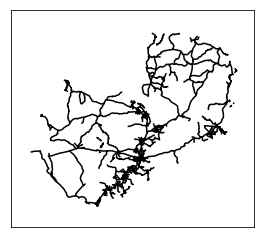

In [52]:
for info, road in zip(m.roads_info, m.roads):
        x, y = zip(*road) 
        m.plot(x, y, marker=None,color='k')
    

In [26]:
roadType = []
roadCondition = []

for road in m.roads_info:
    roadType.append(road['TYPE'])
    roadCondition.append(road['Condition_'])

roadInfo = pd.DataFrame(data={'type': roadType, 'condition': roadCondition})

In [28]:
roadInfo['type'].value_counts()

Secondary            1740
access                142
Primary               112
Tertiary               44
b'              '      34
Other                   1
Name: type, dtype: int64

In [29]:
roadInfo['condition'].value_counts()

3    1993
2      72
1       7
4       1
Name: condition, dtype: int64

In [32]:
pd.crosstab(roadInfo['type'], roadInfo['condition'])

condition,1,2,3,4
type,,,,
b' ',0,0,34,0
Other,0,0,1,0
Primary,6,33,72,1
Secondary,0,3,1737,0
Tertiary,1,36,7,0
access,0,0,142,0
